In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest

data = pd.read_csv('insurance.csv')
data.shape

(1338, 7)

# Anomaly analysis

In [20]:
print("Dataset Information:")
data.info()
print("\nDataset Description:")
print(data.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Dataset Description:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34

=== EDA Insight for 'Charges' ===


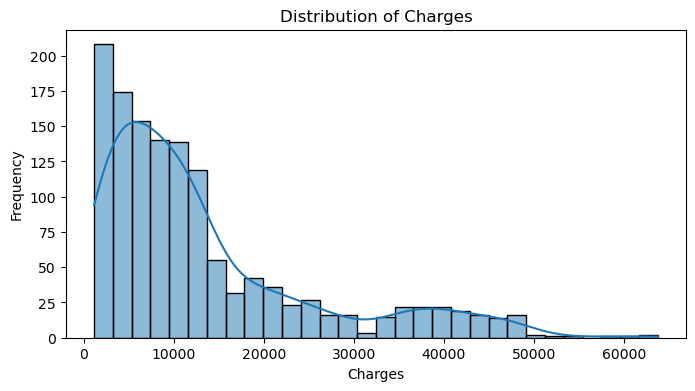

Charges Distribution: Skewed/Non-Normal (using IQR threshold)


In [21]:
# Step 1: Distribution Analysis for Charges (EDA Insight)
print("=== EDA Insight for 'Charges' ===")
plt.figure(figsize=(8, 4))
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

# Distribution Check for Charges: Shapiro-Wilk and Kolmogorov-Smirnov tests
shapiro_p_value = shapiro(data['charges'])[1]
ks_p_value = kstest(data['charges'], 'norm')[1]

# Determine if the data is normally distributed based on the tests
if shapiro_p_value > 0.05 and ks_p_value > 0.05:
    distribution_type = "Normal"
    print("Charges Distribution: Normal (using Standard Deviation threshold)")
else:
    distribution_type = "Skewed/Non-Normal"
    print("Charges Distribution: Skewed/Non-Normal (using IQR threshold)")

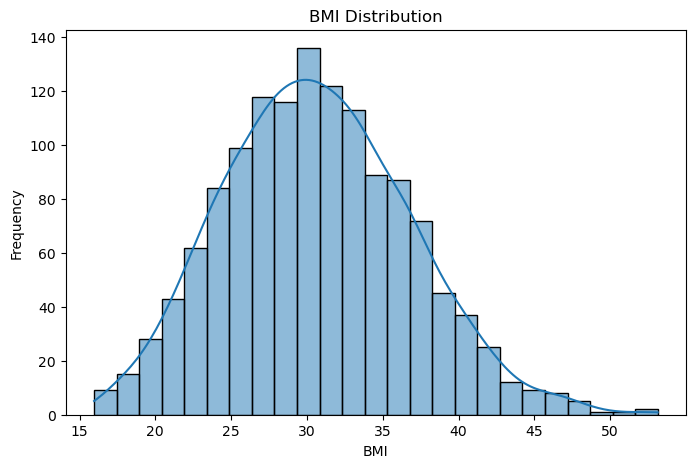

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(data['bmi'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Step 2: Apply Threshold Calculation Based on Distribution Type

def detect_anomalies_in_charges(data, distribution_type):
    if distribution_type == "Normal":
        # Normal Distribution: Use ±3 SD from the mean as threshold
        mean = data['charges'].mean()
        std_dev = data['charges'].std()
        lower_bound = mean - 3 * std_dev
        upper_bound = mean + 3 * std_dev
        threshold_method = "Standard Deviation"
    else:
        # Skewed Distribution: Use IQR for outlier detection
        Q1 = data['charges'].quantile(0.25)
        Q3 = data['charges'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        threshold_method = "IQR"
    
    # Identify anomalies based on the calculated thresholds
    anomalies = data[(data['charges'] < lower_bound) | (data['charges'] > upper_bound)]
    
    # Print details of flagged anomalies
    print(f"\nCharges - {threshold_method} Thresholds: Lower={lower_bound}, Upper={upper_bound}")
    print("Flagged Anomalies in 'Charges':")
    print(anomalies if not anomalies.empty else "No anomalies detected.")
    return anomalies

# Detect anomalies in 'charges'
charges_anomalies = detect_anomalies_in_charges(data, distribution_type)


Charges - IQR Thresholds: Lower=-13109.1508975, Upper=34489.350562499996
Flagged Anomalies in 'Charges':
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


In [24]:

# Step 3: Additional Business Logic Checks for Charges
print("\n=== Additional Business Logic Checks for 'Charges' ===")
# Check for unusual low charges among smokers
low_charge_smokers = data[(data['smoker'] == 'yes') & (data['charges'] < data['charges'].mean())]
if not low_charge_smokers.empty:
    print("Anomalous low charges for smokers:\n", low_charge_smokers[['age', 'bmi', 'smoker', 'charges']])
else:
    print("No unusual low charges detected for smokers.")

# Step 4: Deliverable - Detailed Anomaly Report for Charges

print("\n=== Detailed Anomaly Report for 'Charges' ===")
if not charges_anomalies.empty:
    print("\nAnomalies in 'Charges':")
    print(charges_anomalies[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])
else:
    print("No anomalies detected in 'Charges'.")

print("\nBusiness Logic Violations:")
if not low_charge_smokers.empty:
    print("Anomalous low charges for smokers:\n", low_charge_smokers[['age', 'bmi', 'smoker', 'charges']])
else:
    print("No business logic violations detected.")


=== Additional Business Logic Checks for 'Charges' ===
Anomalous low charges for smokers:
      age    bmi smoker     charges
250   18  17.29    yes  12829.4551

=== Detailed Anomaly Report for 'Charges' ===

Anomalies in 'Charges':
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370    

# Correlation analysis

/var/folders/qk/ybdyy3x10vs2dn_7zbzbtlrh0000gn/T/ipykernel_3021/1101078692.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


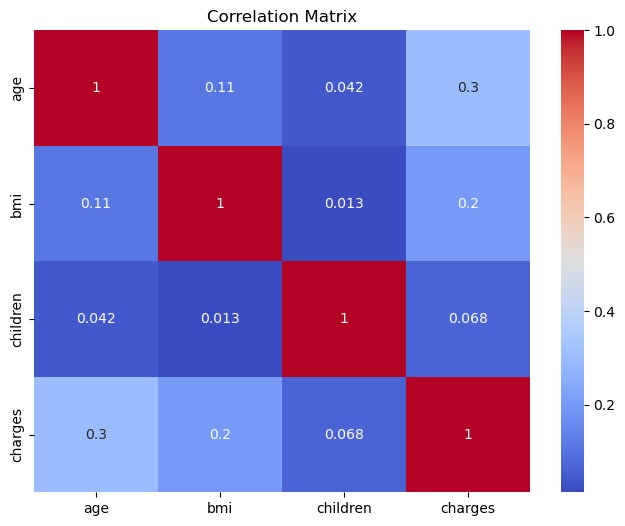

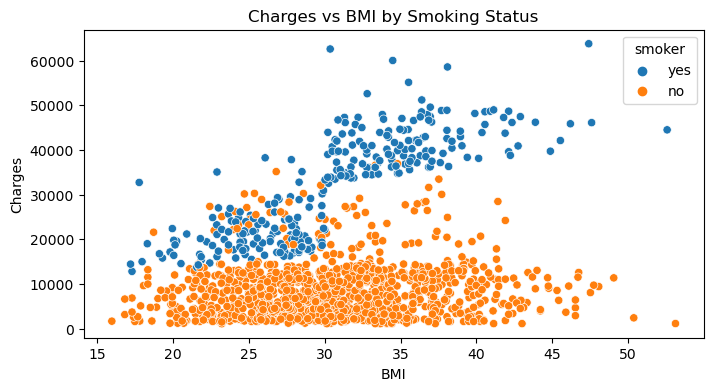

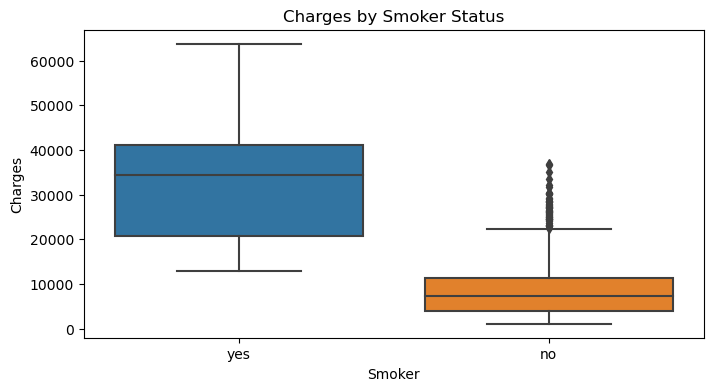

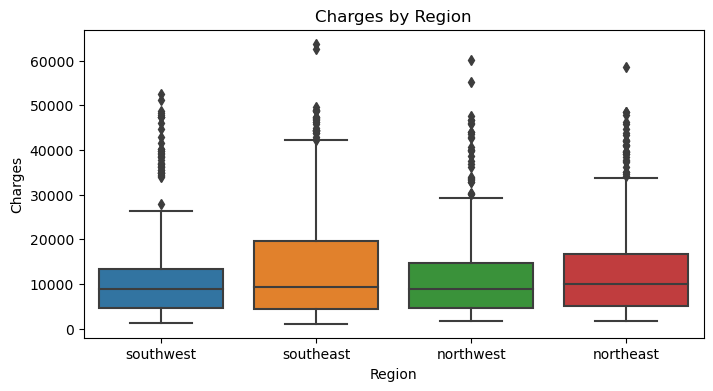

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the correlation matrix for numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot to analyze the relationship between 'charges' and 'bmi', color-coded by 'smoker'
plt.figure(figsize=(8, 4))
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker')
plt.title('Charges vs BMI by Smoking Status')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

# Box plots for categorical variables
# Charges by smoker status
plt.figure(figsize=(8, 4))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges by Smoker Status')
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

# Charges by region
plt.figure(figsize=(8, 4))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Charges by Region')
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

We can see that the only most highly correlated factor the the charges is smoke, the other factors doesn't affect that much

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import shap
import numpy as np


# Preprocess categorical variables
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features and target variable
X = data.drop('charges', axis=1)
y = data['charges']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

# Calculate RMSE manually
rmse = np.sqrt(np.mean((y_test - xgb_predictions) ** 2))
print(f"XGBoost RMSE: {rmse}")

XGBoost RMSE: 4840.9404682796485


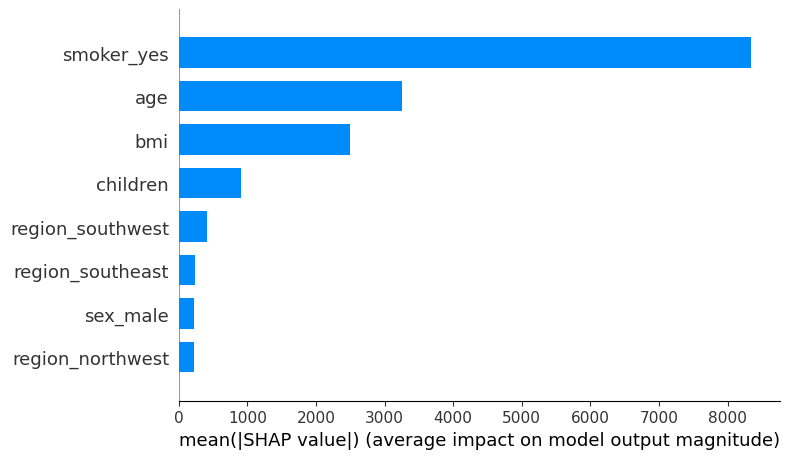

In [27]:
# Use SHAP to explain feature importance
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [28]:
# Extract the record for analysis
record_index = 250
record = data.loc[[record_index]].drop('charges', axis=1)  # Drop target column for prediction

# Predict the charges for this record
predicted_charge = xgb_model.predict(record)
actual_charge = data.loc[record_index, 'charges']

print(f"Actual Charge: {actual_charge}")
print(f"Predicted Charge: {predicted_charge[0]}")

Actual Charge: 12829.4551
Predicted Charge: 13021.041015625


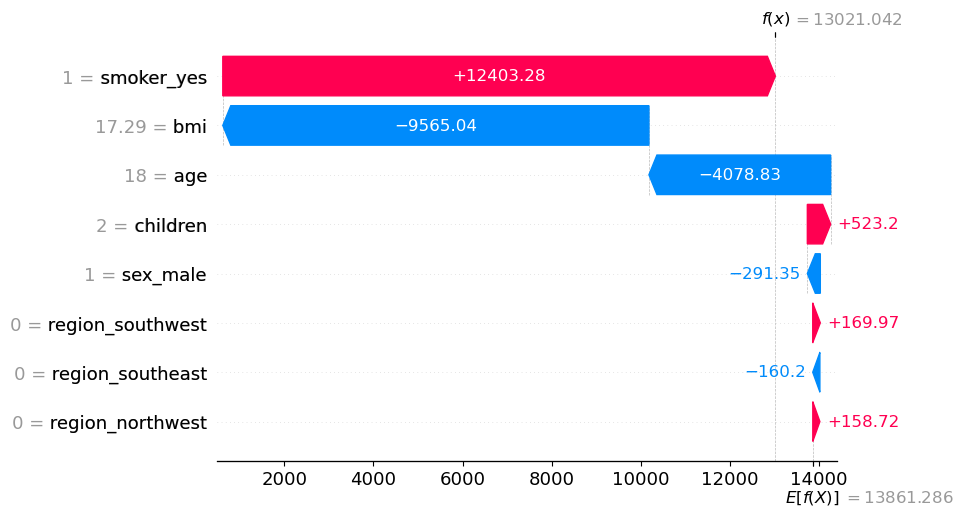

In [29]:
# Generate SHAP values for this single record
explainer = shap.Explainer(xgb_model, X_train)
shap_values_single = explainer(record)

# Plot the SHAP values for this record to see feature impacts
shap.waterfall_plot(shap.Explanation(values=shap_values_single.values[0], 
                                     base_values=shap_values_single.base_values[0], 
                                     feature_names=X.columns, 
                                     data=record.iloc[0]))

In [30]:
# print("\n=== Additional Business Logic Checks for 'Charges' ===")
# # Check for unusual low charges among smokers
# low_charge_smokers = data[(data['smoker'] == 'yes') & (data['charges'] < data['charges'].mean())]
# if not low_charge_smokers.empty:
#     print("Anomalous low charges for smokers:\n", low_charge_smokers[['age', 'bmi', 'smoker', 'charges']])
# else:
#     print("No unusual low charges detected for smokers.")

In [35]:
import pandas as pd
import shap

def generate_relative_explanation(shap_values_single, record, low_charge_smokers, original_data):
    # Get the index of the record for lookup
    record_index = record.index[0]
    is_anomalous = record_index in low_charge_smokers.index
    
    # Extract SHAP values and data
    shap_df = pd.DataFrame({
        'feature': shap_values_single.feature_names,
        'value': shap_values_single.data[0],
        'shap_value': shap_values_single.values[0]
    })

    # Sort by the absolute impact of SHAP values
    shap_df['abs_shap_value'] = shap_df['shap_value'].abs()
    shap_df = shap_df.sort_values(by='abs_shap_value', ascending=False)
    
    # Get the actual and predicted charges
    base_charge = shap_values_single.base_values[0]
    predicted_charge = base_charge + shap_df['shap_value'].sum()
    actual_charge = original_data.loc[record_index, 'charges']
    
    # Begin the summary explanation
    explanation = (
        f"This record is flagged as abnormal because the individual is a smoker with a low actual charge "
        f"of ${actual_charge:,.2f}, which is below the expected level for smokers.\n\n"
    )
    
    # Describe the SHAP contributions in relative terms
    explanation += f"The base charge (average for the dataset) starts at approximately ${base_charge:,.2f}.\n"
    explanation += "SHAP values indicate the following feature impacts on the predicted charge:\n"
    
    for _, row in shap_df.head(3).iterrows():
        feature = row['feature']
        value = row['value']
        shap_contribution = row['shap_value']
        direction = "increases" if shap_contribution > 0 else "decreases"
        
        explanation += (
            f"- **{feature}** (value: {value}) {direction} the charge by ${abs(shap_contribution):,.2f}, "
            f"adjusting it further from the base.\n"
        )
    
    # Add final SHAP-based summary
    explanation += (
        f"\nOverall, the SHAP values adjust the predicted charge to ${predicted_charge:,.2f}, "
        f"which is close to the actual charge of ${actual_charge:,.2f}."
    )
    
    return explanation

# Generate the relative explanation
explanation_text = generate_relative_explanation(shap_values_single, record, low_charge_smokers, data)
print(explanation_text)

This record is flagged as abnormal because the individual is a smoker with a low actual charge of $12,829.46, which is below the expected level for smokers.

The base charge (average for the dataset) starts at approximately $13,861.29.
SHAP values indicate the following feature impacts on the predicted charge:
- **smoker_yes** (value: 1.0) increases the charge by $12,403.28, adjusting it further from the base.
- **bmi** (value: 17.29) decreases the charge by $9,565.04, adjusting it further from the base.
- **age** (value: 18.0) decreases the charge by $4,078.83, adjusting it further from the base.

Overall, the SHAP values adjust the predicted charge to $13,021.04, which is close to the actual charge of $12,829.46.


# LLM generate the report

In [ ]:
llm_prompt = """

Using the provided value report, give a very brief summary highlighting the key factors contributing to 
the abnormality of the data point. Focus on identifying primary drivers or trends that indicate why 
this data point is abnormal.

{value_report}
"""

The flagged data point is identified as abnormal primarily due to the individual’s status as a smoker with a lower-than-expected actual charge. The primary drivers impacting this data point are as follows:

1.	Smoker Status: Being a smoker typically increases the charge, contributing an additional $12,403.28, which aligns with expectations for higher costs associated with smoking.
2.	BMI: A low BMI value (17.29) notably reduces the charge by $9,565.04, indicating a significant downward adjustment from the base rate, suggesting that the individual’s lower body mass is a key factor in reducing costs.
3.	Age: A young age (18 years) also contributes to a decrease in the predicted charge by $4,078.83, further lowering it.

These factors collectively adjust the predicted charge close to the actual amount ($12,829.46), indicating that the reduced BMI and age are the primary contributors to this unexpectedly low charge for a smoker.